## Question 2: What about the numbers?  

    
   * Top 10 most produced Genres
   * Average Budget per Genre
   * Caculate Profit by Genre
   * Calculate Gross Profit Margin by Genre (how much money in return per every dollar invested)


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r genres_df
%store -r numbers_df

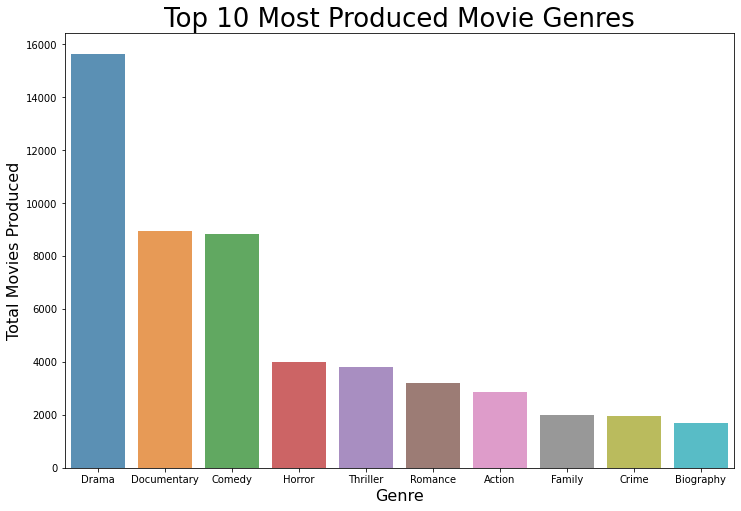

In [41]:
genres_count = genres_df['genres'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(genres_count.index, genres_count.values, alpha=0.8)
plt.title('Top 10 Most Produced Movie Genres', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Genre', fontsize=16) 
plt.show()

Up next, I will merge genres_df and numbers_df to obtain financial information per genre.

In [42]:
numbers_by_genre = pd.merge(genres_df, numbers_df, on='movie', how='right')
numbers_by_genre.info()
numbers_by_genre.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 0 to 2479
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              2480 non-null   object
 1   genres             541 non-null    object
 2   production_budget  2480 non-null   int64 
 3   domestic_gross     2480 non-null   int64 
 4   worldwide_gross    2480 non-null   int64 
 5   year               2480 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 135.6+ KB


,movie,genres,production_budget,domestic_gross,worldwide_gross,year
0,Pirates of the Caribbean: On Stranger Tides,NaN,410600000,241063875,1045663875,2011
1,Dark Phoenix,NaN,350000000,42762350,149762350,2019
2,Avengers: Age of Ultron,NaN,330600000,459005868,1403013963,2015
3,Star Wars Ep. VIII: The Last Jedi,NaN,317000000,620181382,1316721747,2017
4,Star Wars Ep. VII: The Force Awakens,NaN,306000000,936662225,2053311220,2015


In [43]:
numbers_by_genre['gross_profit'] = numbers_by_genre['worldwide_gross'] - numbers_by_genre['production_budget']

In [44]:
numbers_by_genre['gross_margin'] = (
    numbers_by_genre['worldwide_gross'] - numbers_by_genre[
        'production_budget'])/ numbers_by_genre['worldwide_gross']

In [45]:
numbers_by_genre.head()

,movie,genres,production_budget,domestic_gross,worldwide_gross,year,gross_profit,gross_margin
0,Pirates of the Caribbean: On Stranger Tides,NaN,410600000,241063875,1045663875,2011,635063875,0.607331
1,Dark Phoenix,NaN,350000000,42762350,149762350,2019,-200237650,-1.337036
2,Avengers: Age of Ultron,NaN,330600000,459005868,1403013963,2015,1072413963,0.764364
3,Star Wars Ep. VIII: The Last Jedi,NaN,317000000,620181382,1316721747,2017,999721747,0.759251
4,Star Wars Ep. VII: The Force Awakens,NaN,306000000,936662225,2053311220,2015,1747311220,0.850972


In [46]:
genre_grp = numbers_by_genre.groupby(numbers_by_genre.genres)

In [47]:
mean_budget = genre_grp['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)

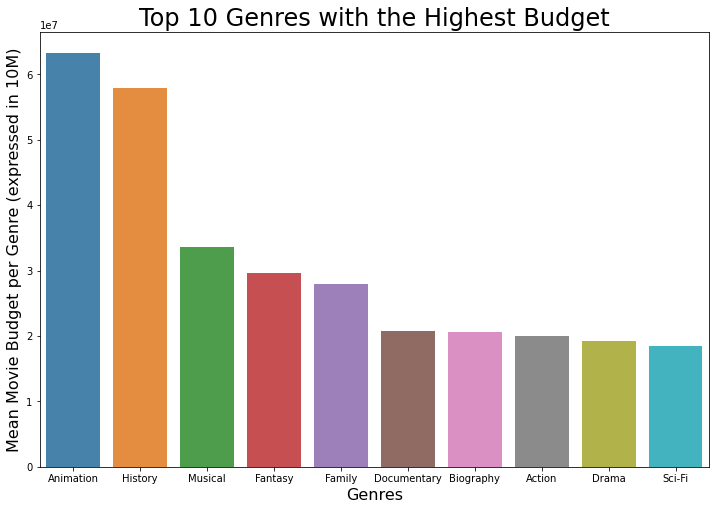

In [48]:
# Budget per genre  x = genre, y = avg(budget)
mean_budget = mean_budget[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_budget.index, mean_budget.values, alpha=0.9)
plt.title('Top 10 Genres with the Highest Budget', fontsize=24)
plt.ylabel('Mean Movie Budget per Genre (expressed in 10M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [35]:
mean_profit = genre_grp['gross_profit'].mean()
mean_profit.sort_values(ascending=False, inplace=True)

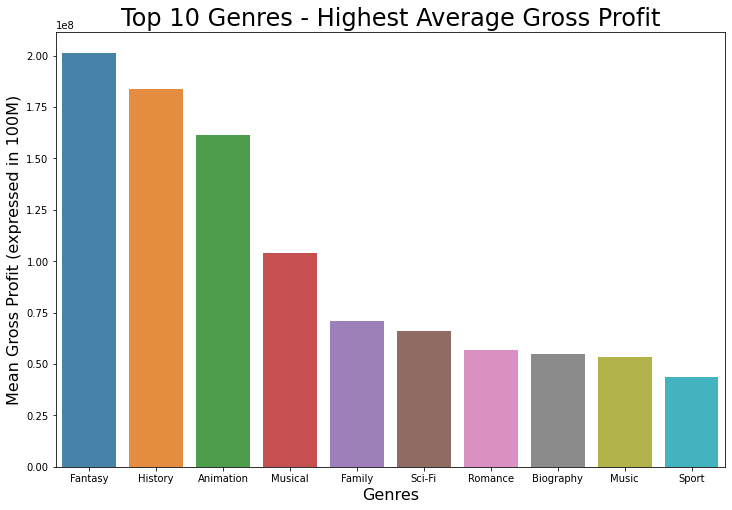

In [37]:
mean_profit = mean_profit[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_profit.index, mean_profit.values, alpha=0.9)
plt.title('Top 10 Genres - Highest Average Gross Profit', fontsize=24)
plt.ylabel('Mean Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [33]:
mean_margin = genre_grp['gross_margin'].mean()
mean_margin.sort_values(ascending=False, inplace=True)

In [39]:
mean_margin = mean_margin[:10,]
mean_margin.head(10)

genres
Musical        0.779546
History        0.593623
News          -5.199141
Fantasy            -inf
Adventure          -inf
Animation          -inf
Biography          -inf
Comedy             -inf
Crime              -inf
Documentary        -inf
Name: gross_margin, dtype: float64

In [22]:

# grouped by genre  (gross revenue – budget)=gross_profit / 
# gross profit margin (gross revenue – budget)/gross revenue 
# (graph1=use bar over bar)  x = genre, y = worldwide_gross revenue, budget, and gross profit margin
# Could show the average gross profit per genre  (x = genre, y = average gross profit $) 
# and/or  show the gross profit margin grouped by genre (x = year, y = gross profit margin) 
# and/or  show the gross profit margin grouped by year (x = year, y = gross profit margin) 
     

In [ ]:
# GROSS PROFIT MARGIN (how much am I getting in return per every dollar invested)